# Cancer_data

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df1 = pd.read_csv('/content/cancer_data.csv')

In [74]:
df1.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Data Preprocessing

In [75]:
df1['diagnosis'] = df1['diagnosis'].replace({'M': 1, 'B': 0})


<ipython-input-75-b290e8070a6b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['diagnosis'] = df1['diagnosis'].replace({'M': 1, 'B': 0})


In [76]:
df1 = df1.drop('id', axis=1)


In [77]:
X = df1.drop('diagnosis', axis=1)  # All columns except 'diagnosis'
y = df1['diagnosis']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [79]:
# Scale all numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models

In [80]:
# Decision Tree Classifiers
dt1 = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
dt2 = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
dt3 = DecisionTreeClassifier(max_depth=None, min_samples_split=5, criterion='gini', random_state=42)

In [81]:
# Random Forest Classifiers
rf1 = RandomForestClassifier(n_estimators=50, max_depth=3, criterion='gini', random_state=42)
rf2 = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='entropy', random_state=42)
rf3 = RandomForestClassifier(n_estimators=200, max_depth=None, criterion='gini', random_state=42)

In [82]:
# Naive Bayes Classifiers
nb1 = GaussianNB(var_smoothing=1e-9)
nb2 = GaussianNB(var_smoothing=1e-5)
nb3 = GaussianNB(var_smoothing=1e-3)

In [83]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Train the model and return its accuracy on the test set."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [84]:
dt_accuracies = []
rf_accuracies = []
nb_accuracies = []

In [85]:
# Decision Tree Results
print("Decision Tree Results:")
dt_acc1 = evaluate_model(dt1, X_train, y_train, X_test, y_test)
dt_accuracies.append(dt_acc1)
print(f"max_depth=3, criterion='gini': {dt_acc1:.4f}")

dt_acc2 = evaluate_model(dt2, X_train, y_train, X_test, y_test)
dt_accuracies.append(dt_acc2)
print(f"max_depth=5, criterion='entropy': {dt_acc2:.4f}")

dt_acc3 = evaluate_model(dt3, X_train, y_train, X_test, y_test)
dt_accuracies.append(dt_acc3)
print(f"max_depth=None, min_samples_split=5, criterion='gini': {dt_acc3:.4f}")

Decision Tree Results:
max_depth=3, criterion='gini': 0.9474
max_depth=5, criterion='entropy': 0.9474
max_depth=None, min_samples_split=5, criterion='gini': 0.9386


In [86]:
# Random Forest Results
print("\nRandom Forest Results:")
rf_acc1 = evaluate_model(rf1, X_train, y_train, X_test, y_test)
rf_accuracies.append(rf_acc1)
print(f"n_estimators=50, max_depth=3, criterion='gini': {rf_acc1:.4f}")

rf_acc2 = evaluate_model(rf2, X_train, y_train, X_test, y_test)
rf_accuracies.append(rf_acc2)
print(f"n_estimators=100, max_depth=5, criterion='entropy': {rf_acc2:.4f}")

rf_acc3 = evaluate_model(rf3, X_train, y_train, X_test, y_test)
rf_accuracies.append(rf_acc3)
print(f"n_estimators=200, max_depth=None, criterion='gini': {rf_acc3:.4f}")


Random Forest Results:
n_estimators=50, max_depth=3, criterion='gini': 0.9649
n_estimators=100, max_depth=5, criterion='entropy': 0.9649
n_estimators=200, max_depth=None, criterion='gini': 0.9649


In [87]:
# Naive Bayes Results
print("\nNaive Bayes Results:")
nb_acc1 = evaluate_model(nb1, X_train, y_train, X_test, y_test)
nb_accuracies.append(nb_acc1)
print(f"var_smoothing=1e-9: {nb_acc1:.4f}")

nb_acc2 = evaluate_model(nb2, X_train, y_train, X_test, y_test)
nb_accuracies.append(nb_acc2)
print(f"var_smoothing=1e-5: {nb_acc2:.4f}")

nb_acc3 = evaluate_model(nb3, X_train, y_train, X_test, y_test)
nb_accuracies.append(nb_acc3)
print(f"var_smoothing=1e-3: {nb_acc3:.4f}")


Naive Bayes Results:
var_smoothing=1e-9: 0.9649
var_smoothing=1e-5: 0.9649
var_smoothing=1e-3: 0.9649


## Plotting the Graphs

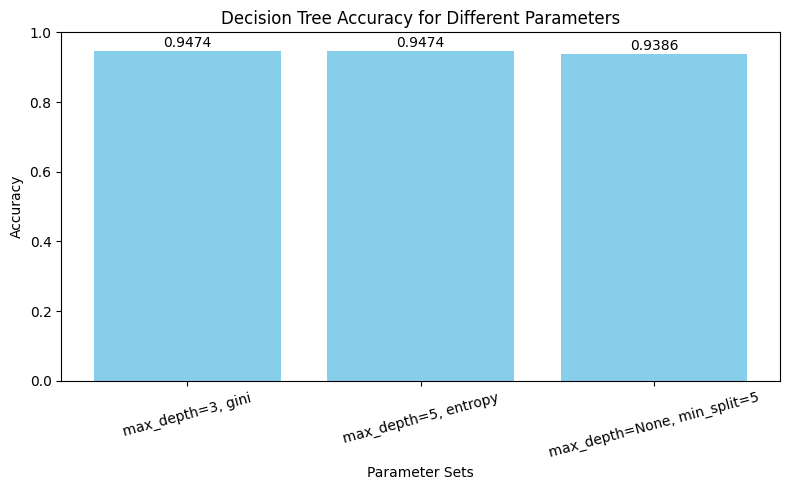

In [88]:
# Decision Tree Plot
plt.figure(figsize=(8, 5))
params_dt = ['max_depth=3, gini', 'max_depth=5, entropy', 'max_depth=None, min_split=5']
plt.bar(params_dt, dt_accuracies, color='skyblue')
plt.title('Decision Tree Accuracy for Different Parameters')
plt.xlabel('Parameter Sets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.xticks(rotation=15)
for i, v in enumerate(dt_accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

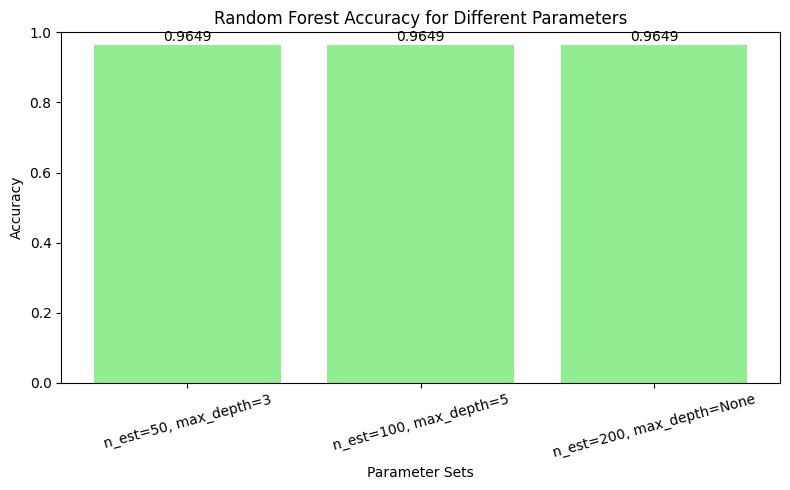

In [89]:
# Random Forest Plot
plt.figure(figsize=(8, 5))
params_rf = ['n_est=50, max_depth=3', 'n_est=100, max_depth=5', 'n_est=200, max_depth=None']
plt.bar(params_rf, rf_accuracies, color='lightgreen')
plt.title('Random Forest Accuracy for Different Parameters')
plt.xlabel('Parameter Sets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=15)
for i, v in enumerate(rf_accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

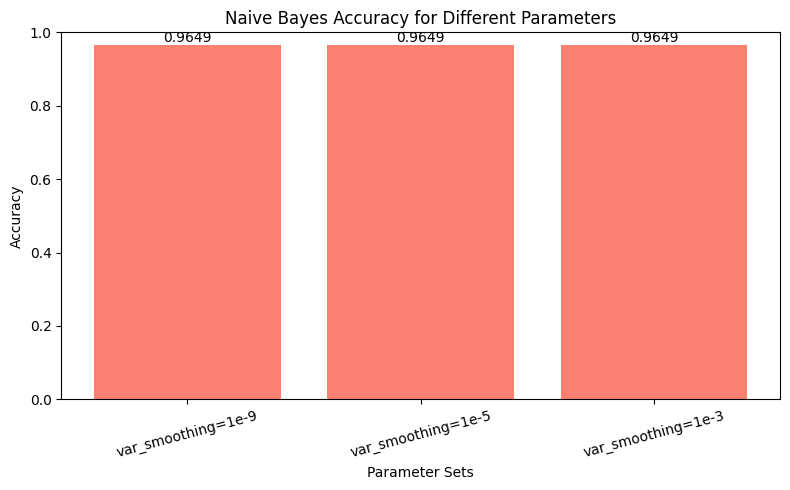

In [90]:
# Naive Bayes Plot
plt.figure(figsize=(8, 5))
params_nb = ['var_smoothing=1e-9', 'var_smoothing=1e-5', 'var_smoothing=1e-3']
plt.bar(params_nb, nb_accuracies, color='salmon')
plt.title('Naive Bayes Accuracy for Different Parameters')
plt.xlabel('Parameter Sets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=15)
for i, v in enumerate(nb_accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

# Diabetes Data

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
df = pd.read_csv('/content/diabetes_data_upload.csv')

## Data Preprocessing.

In [41]:
df.isna().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [43]:
df.nunique()

,0
Age,51
Gender,2
Polyuria,2
Polydipsia,2
sudden weight loss,2
weakness,2
Polyphagia,2
Genital thrush,2
visual blurring,2
Itching,2


In [27]:
symptom_cols = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

In [28]:
for col in symptom_cols:
    df[col] = df[col].replace({'No': 0, 'Yes': 1})

<ipython-input-28-083e77e1ad77>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'No': 0, 'Yes': 1})


In [29]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['class'] = df['class'].replace({'Negative': 0, 'Positive': 1})

<ipython-input-29-83cdf4a796bf>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
<ipython-input-29-83cdf4a796bf>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'Negative': 0, 'Positive': 1})


In [30]:
X = df.drop('class', axis=1)
y = df['class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])

## Model and Evaluations

In [33]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """Train the model and return its accuracy on the test set."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [34]:
# Decision Tree Classifiers
dt1 = DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=42)
dt2 = DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=42)
dt3 = DecisionTreeClassifier(max_depth=None, min_samples_split=5, criterion='gini', random_state=42)

In [35]:
# Decision Tree Results
print("Decision Tree Results:")
print(f"max_depth=3, criterion='gini': {evaluate_model(dt1, X_train, y_train, X_test, y_test):.4f}")
print(f"max_depth=5, criterion='entropy': {evaluate_model(dt2, X_train, y_train, X_test, y_test):.4f}")
print(f"max_depth=None, min_samples_split=5, criterion='gini': {evaluate_model(dt3, X_train, y_train, X_test, y_test):.4f}")

Decision Tree Results:
max_depth=3, criterion='gini': 0.9231
max_depth=5, criterion='entropy': 0.9808
max_depth=None, min_samples_split=5, criterion='gini': 0.9327


In [36]:
# Random Forest Classifiers
rf1 = RandomForestClassifier(n_estimators=50, max_depth=3, criterion='gini', random_state=42)
rf2 = RandomForestClassifier(n_estimators=100, max_depth=5, criterion='entropy', random_state=42)
rf3 = RandomForestClassifier(n_estimators=200, max_depth=None, criterion='gini', random_state=42)

In [38]:
# Random Forest Results
print("\nRandom Forest Results:")
print(f"n_estimators=50, max_depth=3, criterion='gini': {evaluate_model(rf1, X_train, y_train, X_test, y_test):.4f}")
print(f"n_estimators=100, max_depth=5, criterion='entropy': {evaluate_model(rf2, X_train, y_train, X_test, y_test):.4f}")
print(f"n_estimators=200, max_depth=None, criterion='gini': {evaluate_model(rf3, X_train, y_train, X_test, y_test):.4f}")


Random Forest Results:
n_estimators=50, max_depth=3, criterion='gini': 0.8942
n_estimators=100, max_depth=5, criterion='entropy': 0.9712
n_estimators=200, max_depth=None, criterion='gini': 0.9904


In [39]:
# Naive Bayes Classifiers
nb1 = GaussianNB(var_smoothing=1e-9)
nb2 = GaussianNB(var_smoothing=1e-5)
nb3 = GaussianNB(var_smoothing=1e-3)

In [40]:
# Naive Bayes Results
print("\nNaive Bayes Results:")
print(f"var_smoothing=1e-9: {evaluate_model(nb1, X_train, y_train, X_test, y_test):.4f}")
print(f"var_smoothing=1e-5: {evaluate_model(nb2, X_train, y_train, X_test, y_test):.4f}")
print(f"var_smoothing=1e-3: {evaluate_model(nb3, X_train, y_train, X_test, y_test):.4f}")


Naive Bayes Results:
var_smoothing=1e-9: 0.9135
var_smoothing=1e-5: 0.9135
var_smoothing=1e-3: 0.9135


## Plotting in Graph

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [56]:
dt_accuracies = []
rf_accuracies = []
nb_accuracies = []


In [57]:
# Decision Tree Results
print("Decision Tree Results:")
dt_acc1 = evaluate_model(dt1, X_train, y_train, X_test, y_test)
dt_accuracies.append(dt_acc1)
print(f"max_depth=3, criterion='gini': {dt_acc1:.4f}")

dt_acc2 = evaluate_model(dt2, X_train, y_train, X_test, y_test)
dt_accuracies.append(dt_acc2)
print(f"max_depth=5, criterion='entropy': {dt_acc2:.4f}")

dt_acc3 = evaluate_model(dt3, X_train, y_train, X_test, y_test)
dt_accuracies.append(dt_acc3)
print(f"max_depth=None, min_samples_split=5, criterion='gini': {dt_acc3:.4f}")

Decision Tree Results:
max_depth=3, criterion='gini': 0.9231
max_depth=5, criterion='entropy': 0.9808
max_depth=None, min_samples_split=5, criterion='gini': 0.9327


In [58]:
# Random Forest Results
print("\nRandom Forest Results:")
rf_acc1 = evaluate_model(rf1, X_train, y_train, X_test, y_test)
rf_accuracies.append(rf_acc1)
print(f"n_estimators=50, max_depth=3, criterion='gini': {rf_acc1:.4f}")

rf_acc2 = evaluate_model(rf2, X_train, y_train, X_test, y_test)
rf_accuracies.append(rf_acc2)
print(f"n_estimators=100, max_depth=5, criterion='entropy': {rf_acc2:.4f}")

rf_acc3 = evaluate_model(rf3, X_train, y_train, X_test, y_test)
rf_accuracies.append(rf_acc3)
print(f"n_estimators=200, max_depth=None, criterion='gini': {rf_acc3:.4f}")


Random Forest Results:
n_estimators=50, max_depth=3, criterion='gini': 0.8942
n_estimators=100, max_depth=5, criterion='entropy': 0.9712
n_estimators=200, max_depth=None, criterion='gini': 0.9904


In [59]:
# Naive Bayes Results
print("\nNaive Bayes Results:")
nb_acc1 = evaluate_model(nb1, X_train, y_train, X_test, y_test)
nb_accuracies.append(nb_acc1)
print(f"var_smoothing=1e-9: {nb_acc1:.4f}")

nb_acc2 = evaluate_model(nb2, X_train, y_train, X_test, y_test)
nb_accuracies.append(nb_acc2)
print(f"var_smoothing=1e-5: {nb_acc2:.4f}")

nb_acc3 = evaluate_model(nb3, X_train, y_train, X_test, y_test)
nb_accuracies.append(nb_acc3)
print(f"var_smoothing=1e-3: {nb_acc3:.4f}")


Naive Bayes Results:
var_smoothing=1e-9: 0.9135
var_smoothing=1e-5: 0.9135
var_smoothing=1e-3: 0.9135


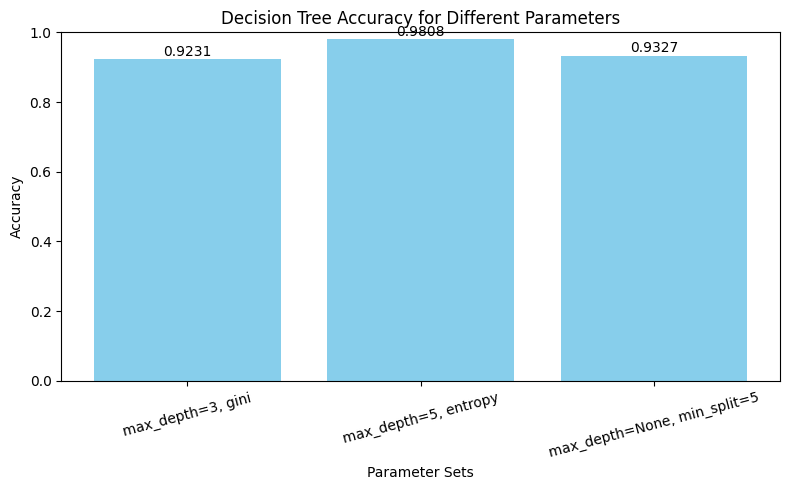

In [69]:
# Decision Tree Plot
plt.figure(figsize=(8, 5))
params_dt = ['max_depth=3, gini', 'max_depth=5, entropy', 'max_depth=None, min_split=5']
plt.bar(params_dt, dt_accuracies, color='skyblue')
plt.title('Decision Tree Accuracy for Different Parameters')
plt.xlabel('Parameter Sets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.xticks(rotation=15)
for i, v in enumerate(dt_accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

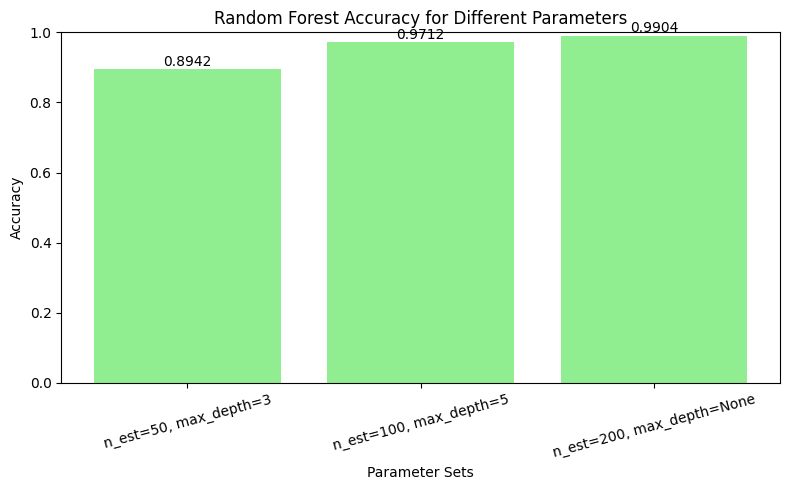

In [68]:
# Random Forest Plot
plt.figure(figsize=(8, 5))
params_rf = ['n_est=50, max_depth=3', 'n_est=100, max_depth=5', 'n_est=200, max_depth=None']
plt.bar(params_rf, rf_accuracies, color='lightgreen')
plt.title('Random Forest Accuracy for Different Parameters')
plt.xlabel('Parameter Sets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=15)
for i, v in enumerate(rf_accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

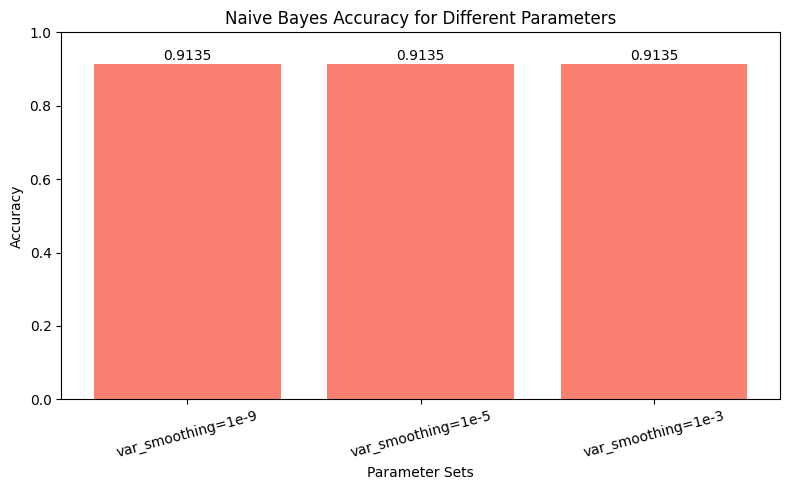

In [67]:
# Naive Bayes Plot
plt.figure(figsize=(8, 5))
params_nb = ['var_smoothing=1e-9', 'var_smoothing=1e-5', 'var_smoothing=1e-3']
plt.bar(params_nb, nb_accuracies, color='salmon')
plt.title('Naive Bayes Accuracy for Different Parameters')
plt.xlabel('Parameter Sets')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=15)
for i, v in enumerate(nb_accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()